# ENSO: oscilador de recarga con ruido

En el notebook anterior analizamos el modelo del ENSO basado en un oscilador de recarga en su versión determinista, observando que, con amortiguamiento, las trayectorias tienden a relajarse hacia un equilibrio.

En este notebook introducimos **ruido** como representación idealizada de procesos no incluidos explícitamente en el modelo (por ejemplo, variabilidad atmosférica de corta escala temporal). El objetivo es observar cómo estas perturbaciones pueden mantener al sistema alejado del equilibrio y generar una variabilidad sostenida, sin necesidad de un forzamiento periódico.


## Guía de trabajo

1. Introduciremos una versión con ruido del modelo (ruido aditivo en la ecuación de $T$).
2. Visualizaremos una realización del ruido para entender qué estamos añadiendo.
3. Simularemos el sistema y compararemos:
   - la evolución temporal de $T(t)$ y $h(t)$,
   - y la trayectoria en el diagrama de fase $(T,h)$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Semilla para reproducibilidad (si la cambias, obtendrás otra realización del ruido)
np.random.seed(42)

# Opcional: tamaño de figuras por defecto
plt.rcParams["figure.figsize"] = (10, 4)


## Recordatorio: modelo determinista

El modelo determinista lineal se escribe:

$$
\frac{dT}{dt} = -a_{11}T + a_{12}h
$$

$$
\frac{dh}{dt} = -a_{22}h - a_{21}T
$$

donde $T(t)$ es la anomalía de temperatura superficial y $h(t)$ es una variable oceánica lenta asociada al contenido de calor.

En el caso determinista, si el amortiguamiento domina, la dinámica tiende a relajarse hacia el equilibrio.


## Modelo con ruido (ruido aditivo en $T$)

Para representar de forma idealizada la acción de procesos no modelizados explícitamente, añadimos un término estocástico en la ecuación de $T$:

$$
dT = \left(-a_{11}T + a_{12}h\right)\,dt + \sigma\,dW_t
$$

$$
dh = \left(-a_{22}h - a_{21}T\right)\,dt
$$

Aquí $W_t$ es un proceso de Wiener (ruido blanco idealizado) y $\sigma$ controla la intensidad del ruido.

Este ruido **no impone una periodicidad**. Su papel es introducir perturbaciones continuas que desplazan al sistema respecto al equilibrio. La respuesta del sistema sigue estando organizada por la estructura dinámica del modelo.


In [26]:
# Parámetros del modelo (puedes ajustarlos si ya tienes unos "definitivos" del notebook anterior)
a11 = 1.0
a22 = 0.2
a12 = 1.0
a21 = 1.0  # en la ecuación aparece como -a21*T (según convención del modelo)

# Intensidad del ruido
sigma = 0.6

# Integración temporal
dt = 0.01
t_max = 50.0
t = np.arange(0.0, t_max + dt, dt)
n = len(t)

# Condición inicial
T0 = 0.2
h0 = 0.0


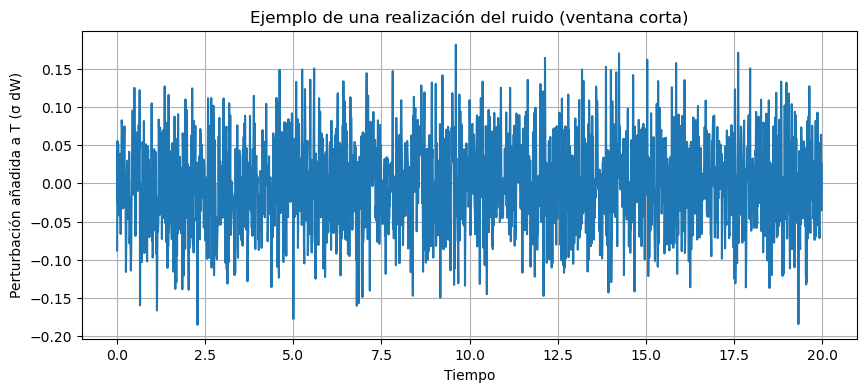

In [27]:
# Ruido blanco discreto: dW ~ sqrt(dt) * N(0,1)
dW = np.sqrt(dt) * np.random.randn(n)

# La "señal" de ruido que entra en T es sigma * dW
ruido = sigma * dW

plt.figure()
plt.plot(t[:2000], ruido[:2000])
plt.xlabel("Tiempo")
plt.ylabel("Perturbación añadida a T (σ dW)")
plt.title("Ejemplo de una realización del ruido (ventana corta)")
plt.grid(True)
plt.show()


In [28]:
T = np.zeros(n)
h = np.zeros(n)
T[0] = T0
h[0] = h0

for k in range(n - 1):
    # Derivas deterministas
    dT_det = (-a11 * T[k] + a12 * h[k]) * dt
    dh_det = (-a22 * h[k] - a21 * T[k]) * dt

    # Paso estocástico (solo en T)
    dT_sto = sigma * dW[k]

    T[k + 1] = T[k] + dT_det + dT_sto
    h[k + 1] = h[k] + dh_det


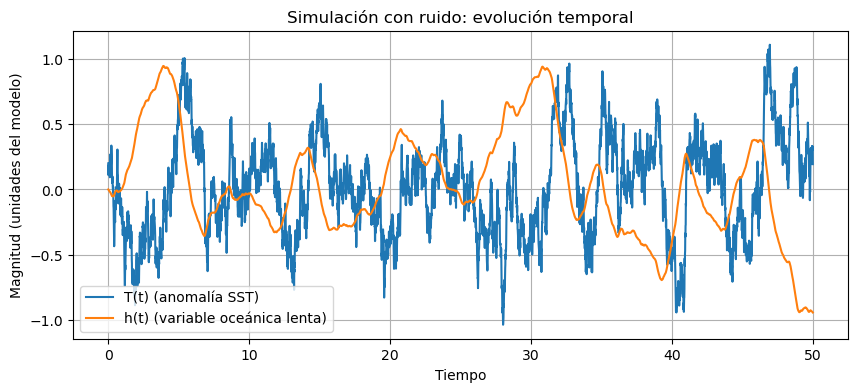

In [29]:
plt.figure()
plt.plot(t, T, label="T(t) (anomalía SST)")
plt.plot(t, h, label="h(t) (variable oceánica lenta)")
plt.xlabel("Tiempo")
plt.ylabel("Magnitud (unidades del modelo)")
plt.title("Simulación con ruido: evolución temporal")
plt.grid(True)
plt.legend()
plt.show()


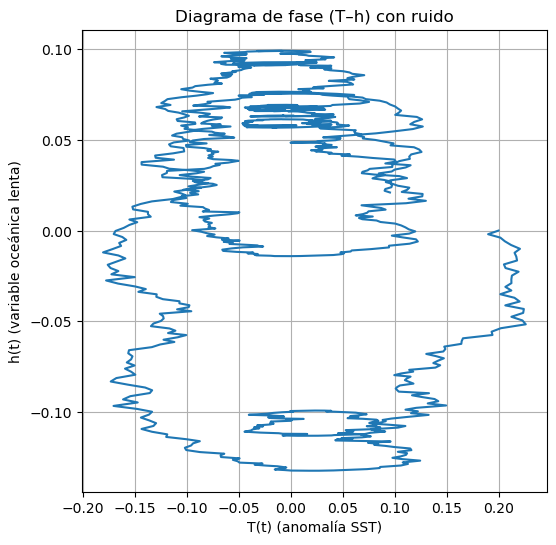

In [22]:
plt.figure(figsize=(6, 6))
plt.plot(T, h, linewidth=1.5)
plt.xlabel("T(t) (anomalía SST)")
plt.ylabel("h(t) (variable oceánica lenta)")
plt.title("Diagrama de fase (T–h) con ruido")
plt.grid(True)
plt.show()


## Interpretación cualitativa

En el modelo determinista, el sistema tiende a relajarse hacia el equilibrio. Al introducir ruido, el sistema recibe perturbaciones continuas que lo desplazan y evitan una convergencia “limpia”.

Esto no significa que el ruido cree por sí mismo la oscilación. El ruido actúa como una fuente continua de perturbaciones, mientras que la estructura dinámica del modelo organiza la respuesta del sistema y favorece una variabilidad coherente en el plano $(T,h)$.


## Preguntas 

En este modelo, el ruido actúa como una fuente continua de perturbaciones que mantiene al sistema alejado del equilibrio, mientras que la estructura dinámica del oscilador organiza la respuesta.

Para afianzar esta idea, realiza las siguientes exploraciones:

1) **Escalas temporales y “zoom” dinámico**  
   Vuelve a la celda de definición de parámetros y modifica el valor de `t_max`.  
   - Prueba valores más pequeños para observar con detalle la dinámica a corto plazo.  
   - Usa valores más grandes para identificar patrones de variabilidad a escalas temporales más largas.  
   Describe brevemente qué aspectos del comportamiento del sistema se hacen visibles en cada caso.

2) **Intensidad del ruido**  
   Modifica el parámetro `sigma`, que controla la intensidad del ruido:
   - prueba valores más pequeños (ruido débil),
   - y valores mayores (ruido más intenso).  
   Analiza cómo cambia la amplitud de las oscilaciones y la forma de la trayectoria en el diagrama de fases.

3) **Interpretación conceptual**  
   A partir de las simulaciones anteriores, explica con tus propias palabras por qué el sistema puede mostrar una variabilidad sostenida sin necesidad de un forzamiento externo periódico, y qué papel desempeñan respectivamente:
   - la estructura dinámica del modelo,
   - y las perturbaciones introducidas por el ruido.
